# Stroke Prediction

## Context

Strokes are a significant health concern worldwide, often leading to severe consequences including long-term disability or death. Predicting the likelihood of a stroke can play a crucial role in early intervention and treatment, potentially saving lives and improving patient outcomes.

According to the World Health Organization (WHO), stroke is the second leading cause of death globally, responsible for approximately 11% of total deaths. This project uses a dataset to predict whether a patient is likely to suffer a stroke based on input parameters such as gender, age, various diseases, and smoking status. Each row in the dataset provides relevant information about a patient.

## Source

This dataset is available on Kaggele in the following link:
> https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

## Data Dictionary

- **id**: Unique identifier for each patient. It contains Numeric Data.
- **gender**: Gender of the patient. It contains categorical data. (**"Male", "Female", or "Other"**)
- **age**: Age of the patient. It contains numeric data.
- **hypertension**: It contains binary data whether the patient has hypertension or not. 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- **heart_disease**: It contains binary data whether the patient has heart disease or not. 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
- **ever_married**: It contains categorical data whether the patient is married or not. (**"No" or "Yes"**)
- **work_type**: Type of work of the patient. It contans categorical data. (**"children", "Govt_job", "Never_worked", "Private", or "Self-employed"**)
- **Residence_type**: Type of residence of the patient. It contains categorical data. (**"Rural" or "Urban"**)
- **avg_glucose_level**: Average glucose level in blood. It contains numeric data.
- **smoking_status**: Status of smoking habit of the patient. It contains categorical data. (**"formerly smoked", "never smoked", "smokes", or "Unknown"**)
- **stroke**: It is the output feature. 1 if the patient had a stroke, 0 if not

*Note: "Unknown" in `smoking_status` means that the information is unavailable for this patient.

## Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the data, and uncover the patterns and relationship among the features that influence the risk of stroke.
2. **Data Cleaning**: Clean the data by removing or handlinng missing or null values, outliers, duplicate rows and unnecessary features.


### Load Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.ensemble import IsolationForest
import ppscore as pps

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")

# Seaborn style
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "healthcare-dataset-stroke-data.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

### General Information

In [4]:
# Show the 1st 5 rows to get an idea about the data in each feature
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 5110
Number of features: 12


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
# Separate Categorical, numerical and binary features
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object" and df[col].nunique() > 2]
bin_cols = [col for col in df.columns if df[col].dtype != "object" and df[col].nunique() == 2]
print("-" * 60)
print(f"Number of categorical features: {len(cat_cols)}")
print(cat_cols)
print("-" * 60)
print(f"Number of binary features: {len(bin_cols)}")
print(bin_cols)
print("-" * 60)
print(f"Number of numerical features: {len(num_cols)}")
print(num_cols)

FEATURE DESCRIPTION
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------
Number of categorical features: 5
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
------------------------------------------------------------
Number of binary features: 3
['hypertension', 'heart_disease', 'stroke']
------------------------------------------------------------
Number of numerical features: 4
['id', 'age', 'avg_glucose_level', 'bmi']


In [7]:
# Missing value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
missing_cols = []
if df.isnull().sum().sum() > 0:
    # Presence of missing values
    print(df.isnull().sum())
    print("-" * 60)
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            missing_cols.append(col)
    print(missing_cols)
else:
    print("No missing value present in any feature")

MISSING VALUE DETECTION
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
------------------------------------------------------------
['bmi']


### Key Findings

BMI contains **201** missing values i.e. **3.94%** of total observations

In [8]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE ROWS DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROWS DETECTION
Number of duplicate rows: 0


### Univariate Analysis

Analysis of each feature separately to understand the distribution of each numerical features and presence of outliers in those features, and proportion of categorical and binary features.

In [9]:
# Statistical analysis of numeric features to get a rough idea about their distribution
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
for col in num_cols:
    print(f"Feature: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Range: {df[col].min()} - {df[col].max()}")
    print("-" * 60)

STATISTICAL SUMMARY
Feature: id
Mean: 36517.82935420744
Median: 36932.0
Standard Deviation: 21161.721624827136
Range: 67 - 72940
------------------------------------------------------------
Feature: age
Mean: 43.226614481409
Median: 45.0
Standard Deviation: 22.61264672311352
Range: 0.08 - 82.0
------------------------------------------------------------
Feature: avg_glucose_level
Mean: 106.1476771037182
Median: 91.88499999999999
Standard Deviation: 45.28356015058203
Range: 55.12 - 271.74
------------------------------------------------------------
Feature: bmi
Mean: 28.893236911794666
Median: 28.1
Standard Deviation: 7.854066729680158
Range: 10.3 - 97.6
------------------------------------------------------------


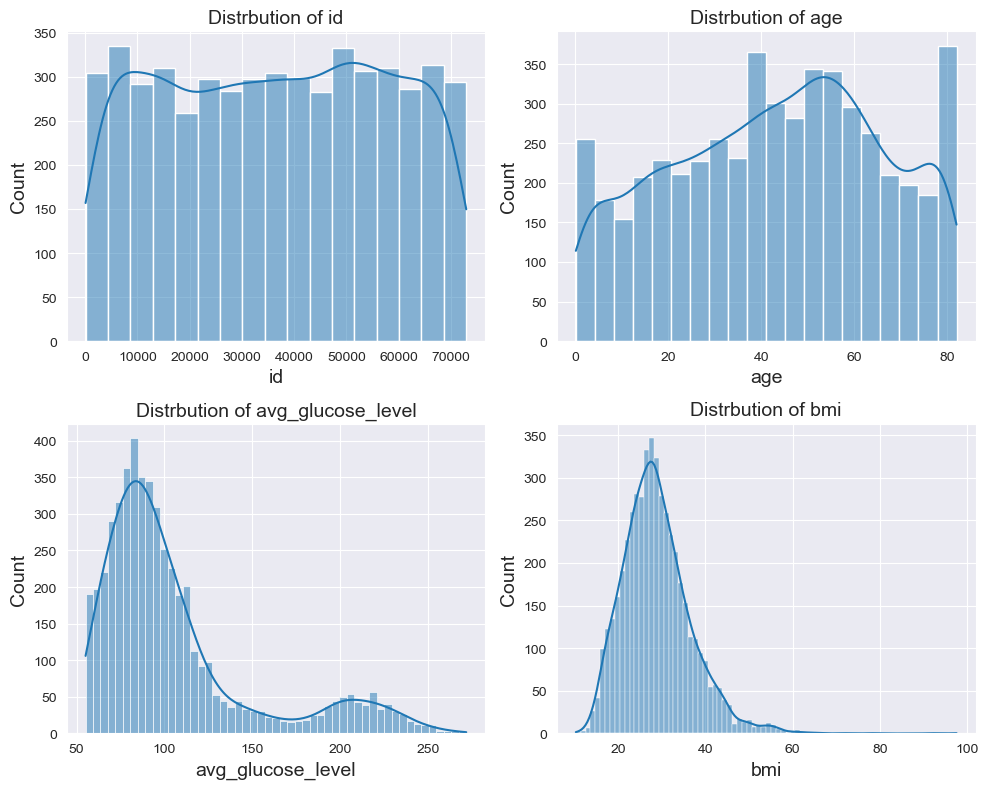

In [10]:
# Visualize distribution of numerical features with Histogram
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize=(10, 8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data= df, x= col, kde=True, ax= axes[i])
    axes[i].set_title(f"Distrbution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()

### Key Findings

- **avg_glucose_level** is skewed right.
- **bmi** is normally distributed but right skewed above 50. There might be some outliers present above 50.

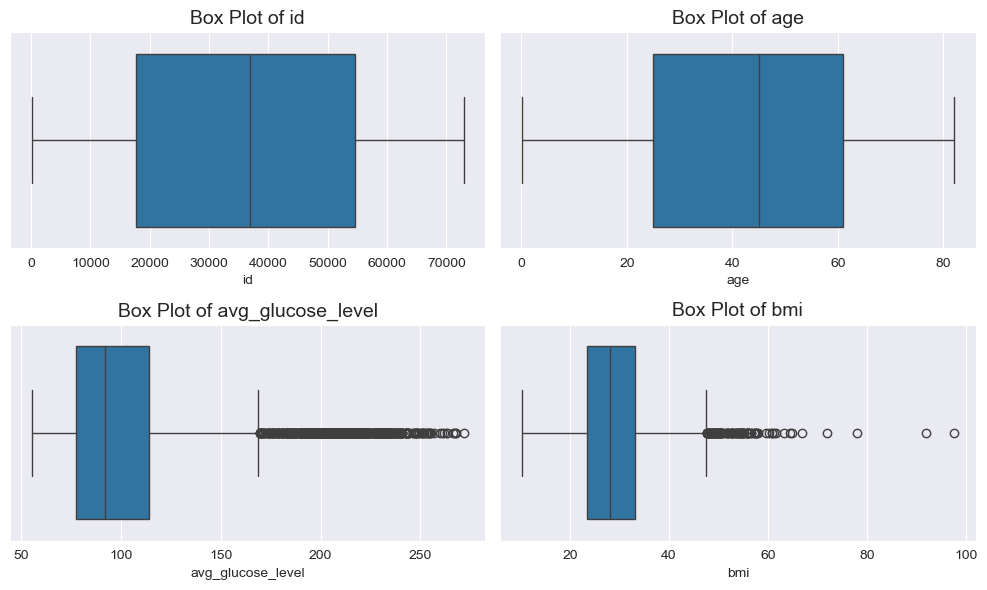

In [11]:
# Outlier detection in numerical features using BOx Plot
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize=(10,6))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x = col, ax= axes[i])
    axes[i].set_title(f"Box Plot of {col}", fontsize=14)
plt.tight_layout()
plt.show()

### Key Findings

**bmi** and **avg_glucose_level** both have outliers above their upper extreme value.

In [12]:
# Count of value in binary features
print("=" * 60)
print("COUNT OF VALUES IN BINARY FEATURES")
print("=" * 60)
for col in bin_cols:
    print(f"Feature: {col}")
    print(df[col].value_counts())
    print("-" * 60)

COUNT OF VALUES IN BINARY FEATURES
Feature: hypertension
hypertension
0    4612
1     498
Name: count, dtype: int64
------------------------------------------------------------
Feature: heart_disease
heart_disease
0    4834
1     276
Name: count, dtype: int64
------------------------------------------------------------
Feature: stroke
stroke
0    4861
1     249
Name: count, dtype: int64
------------------------------------------------------------


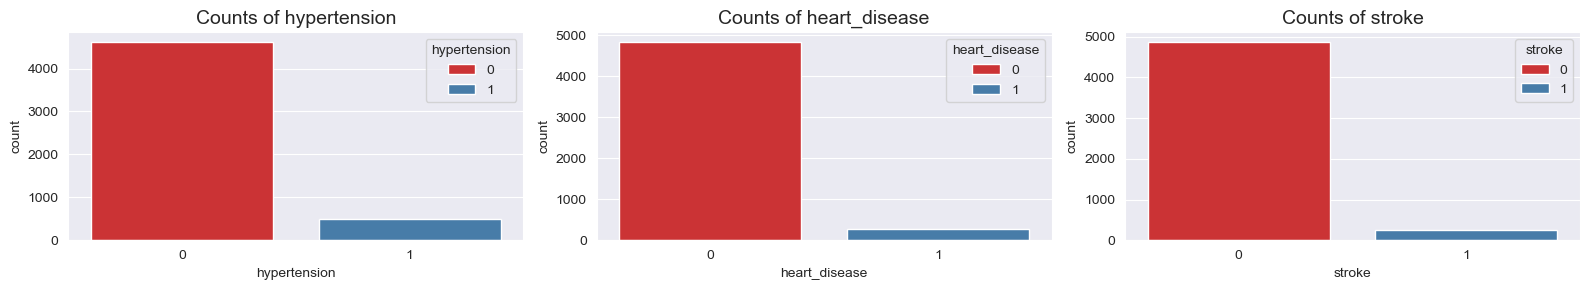

In [13]:
# Visualize the count in binary features
fig, axes = plt.subplots(nrows=1, ncols= 3, figsize=(16, 3))
axes = axes.flatten()
for i, col in enumerate(bin_cols):
    sns.countplot(data=df, x= col, hue=col, palette="Set1", ax= axes[i])
    axes[i].set_title(f"Counts of {col}", fontsize=14)
plt.tight_layout()
plt.show()

### Key Findings

- Most of the observations don't have **hypertension** and **heart disease**
- Observations not having **stroke** is more compared to having. So the dataset is **imbalanced**.

In [14]:
# Count of categorical features
print("=" * 60)
print("COUNT OF VALUES IN CATEGORICAL FEATURES")
print("=" * 60)
for col in cat_cols:
    print(f"Feature: {col}")
    print(df[col].value_counts())
    print("-" * 60)

COUNT OF VALUES IN CATEGORICAL FEATURES
Feature: gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
------------------------------------------------------------
Feature: ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
------------------------------------------------------------
Feature: work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
------------------------------------------------------------
Feature: Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
------------------------------------------------------------
Feature: smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
------------------------------------------------------------


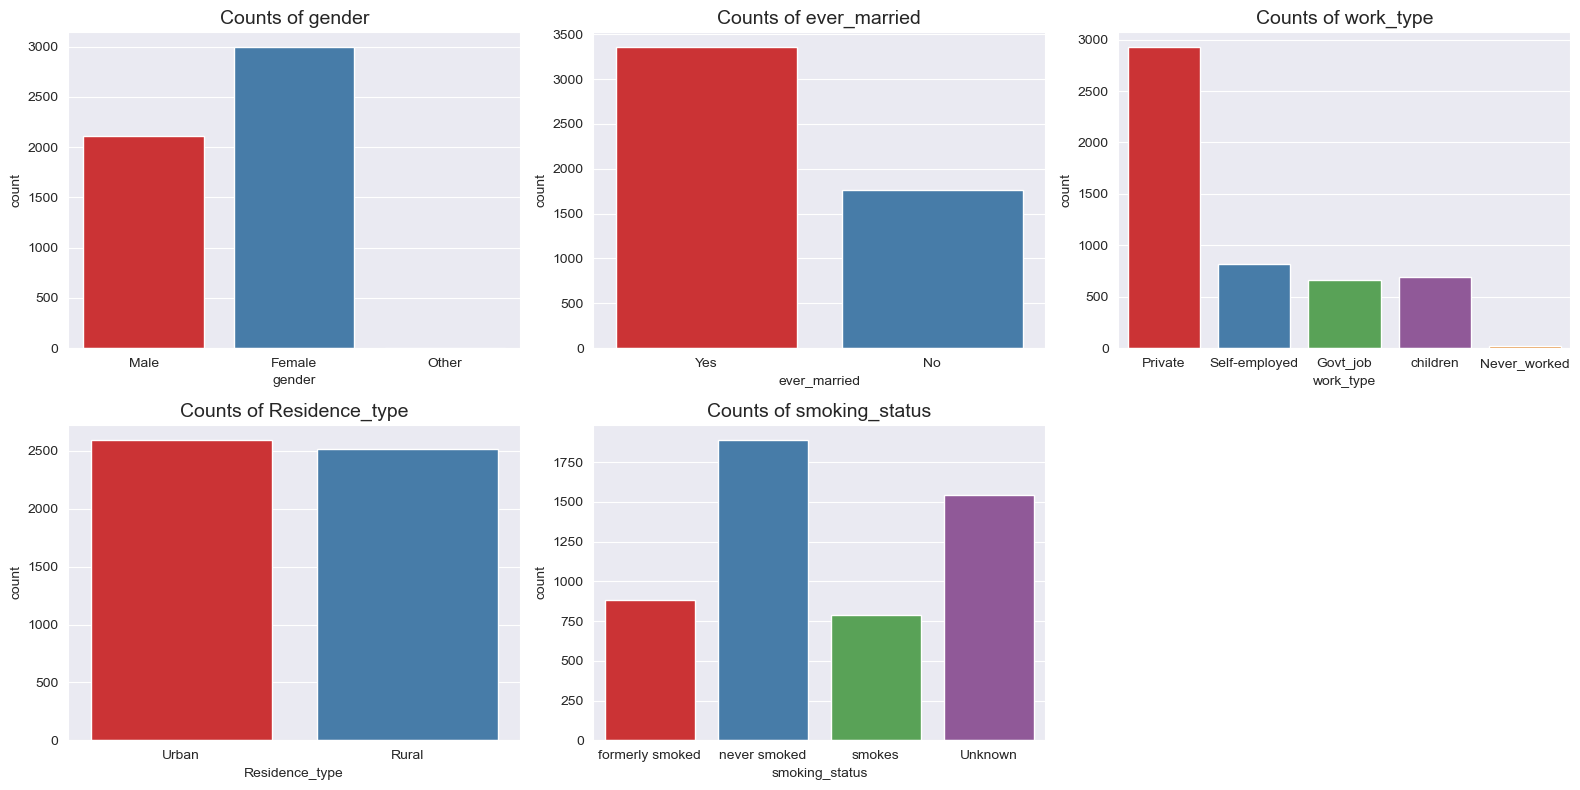

In [15]:
# Visualize the count in categorical features
fig, axes = plt.subplots(nrows=2, ncols= 3, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x= col, hue=col, palette="Set1", ax= axes[i])
    axes[i].set_title(f"Counts of {col}", fontsize=14)
plt.tight_layout()
axes[-1].axis("off")
plt.show()

### Key Findings

- Most of the observations for **married** patients.
- Most of the patients in this observation are work in **Private** sector.
- **Female** observations are present more.
- **Non Smoker** observations are present more.

### Correlation Analysis 

In [19]:
# Find the Pearson's correlation of number type features(numeric and binary) to find the linear correlation anmong the features
corr_cols = num_cols + bin_cols
corr = df[corr_cols].corr().round(2)
corr

,id,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
id,1.00,0.00,0.00,0.00,0.00,-0.00,0.01
age,0.00,1.00,0.24,0.33,0.28,0.26,0.25
avg_glucose_level,0.00,0.24,1.00,0.18,0.17,0.16,0.13
bmi,0.00,0.33,0.18,1.00,0.17,0.04,0.04
hypertension,0.00,0.28,0.17,0.17,1.00,0.11,0.13
heart_disease,-0.00,0.26,0.16,0.04,0.11,1.00,0.13
stroke,0.01,0.25,0.13,0.04,0.13,0.13,1.00


<Axes: >

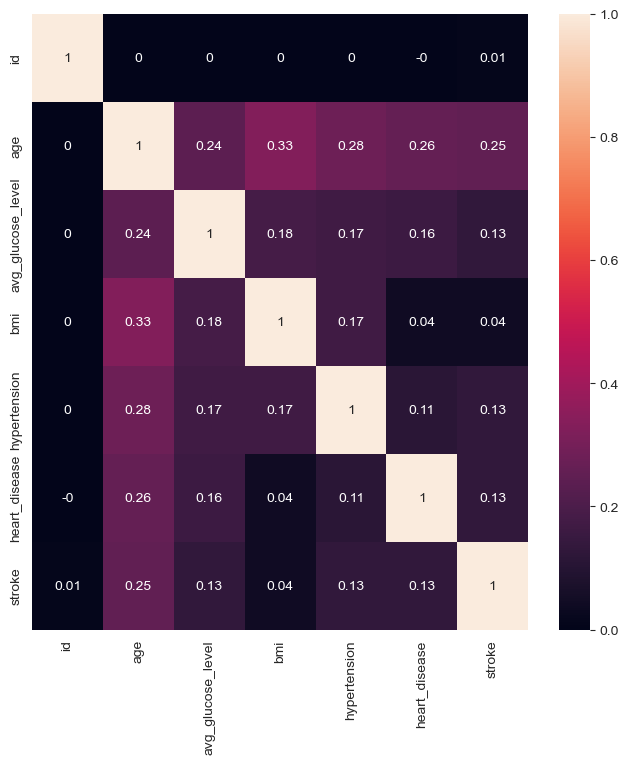

In [20]:
# Visualize correlation with Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True)

In [27]:
# Find non-linear correlation with Predictive Power Score
pp_matrix = pps.matrix(df[corr_cols])
pp_matrix[(pp_matrix["x"] != pp_matrix["y"]) & (pp_matrix["ppscore"] > 0.3)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model


### Key Findings

- From Pearson's correlation analysis it is found that all input features have weak correlation with output feature(stroke) and also with each other. Only Age and BMI has moderate positive correlation.
- From Predictive Power Score analysis find the same.

### Data Cleaning

In [50]:
# Remove Unnecessary features
# Remove id featrure as it contains unique values with does not create any pattern for ML model.
df.drop("id", axis=True, inplace=True)
num_cols.remove("id")

In [51]:
# Remove the rows contaning null values in BMI as only 4% is missing.
df_dn = df.dropna(axis= 0)

In [75]:
# Find outlier rows using IsolationForest
isof = IsolationForest(contamination=0.1, random_state=42)
isof.fit(df_dn[num_cols])

IsolationForest(contamination=0.1, random_state=42)

In [76]:
# Outliers in dropped missing
df_do = df_dn.copy()
df_do["Outlier"] = isof1.predict(df_dn[num_cols])
outliers = df_do[df_do["Outlier"] == -1]
print(f"Number of Outlier rows: {outliers.shape[0]}")


Number of Outlier rows: 491


In [77]:
# Remove the outlier rows
indexes = list(outliers.index)
df_do.drop(indexes, inplace=True)
# Remove the Outlier column
df_do.drop("Outlier", axis=1, inplace=True)
df_do.shape

(4418, 11)

In [78]:
# Save the dropped missing
dn_path = os.path.join(data_path, "stroke_dropped.csv")
df_dn.to_csv(dn_path, index=False)

In [79]:
# Save the dropped missing and removed outliers
do_path = os.path.join(data_path, "stroke_do.csv")
df_do.to_csv(do_path, index= False)